In [2]:
# Import libraries, dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import hvplot.pandas

In [3]:
# Import our healthcare data into pandas from CSV (delete this cell when healthcare info code above is complete to directly create this df)
file_path = 'Resources/combined_data_lesszips.csv'
denver_df = pd.read_csv(file_path, low_memory=False)

denver_df.head()

,Zip Code,Number of Facilities,Population,Per Capita Income,Median Age
0,80218,42,18915,71825,34.9
1,80211,42,36061,59034,34.0
2,80203,34,21368,52577,32.3
3,80204,25,34860,39623,32.6
4,80212,16,20240,53568,37.2


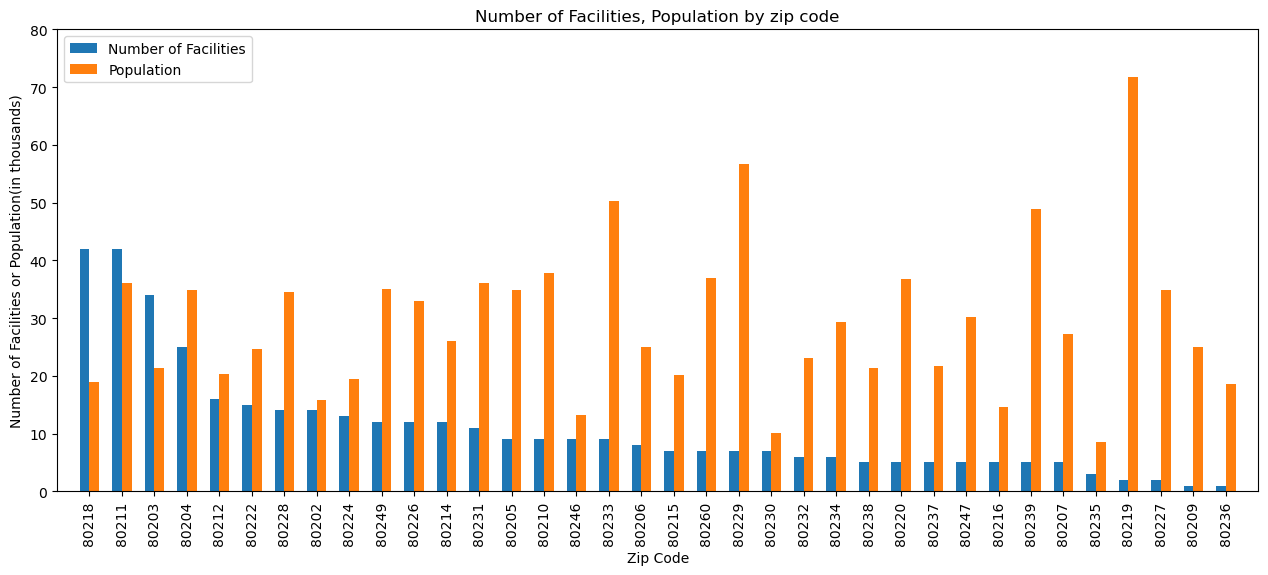

In [7]:
#Create a double bar plot showing each zip code's number of facilities and population
#This example was very useful in creating the plot: https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/
x = denver_df['Zip Code']
facilities = denver_df['Number of Facilities']
pop = denver_df['Population'].div(1000)
pop = pop.values

x_axis = np.arange(len(x))
width = .3
fig = plt.figure(figsize=(15.5, 6))
plt.bar(x_axis - width/2, facilities, width = width, label = "Number of Facilities")


plt.bar(x_axis + width/2, pop, width = width, label = 'Population')
plt.axis([-1, len(x), 0, 80])
plt.xticks(x_axis, x, rotation=90)
plt.xlabel('Zip Code')
plt.ylabel('Number of Facilities or Population(in thousands)')
plt.title("Number of Facilities, Population by zip code")
plt.legend();

plt.savefig('pop_facilities_denver_plot_lesszips.png')


The correlation coefficient between Population and Number of facilities is -0.09 
The p-value is 0.5885897488413002


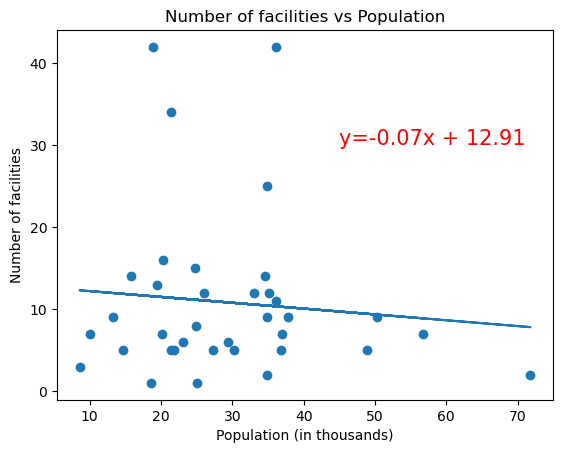

In [9]:
#create a scatter plot Number of facilities vs Population
plt.scatter(pop, facilities)
plt.xlabel('Population (in thousands)')
plt.ylabel('Number of facilities')
plt.title('Number of facilities vs Population')

#perform a linear regression
pe_slope, pe_int, pe_r, pe_p, pe_std_err = stats.linregress(pop, facilities)
#create the equation of a line
pe_fit = pe_slope * pop + pe_int
plt.plot(pop, pe_fit)
plt.annotate(f'y={round(pe_slope, 2)}x + {round(pe_int, 2)}', (45,30), fontsize=15, color='red')
#print the correlation coefficient
corr = stats.pearsonr(pop,facilities)
print(f"The correlation coefficient between Population and Number of facilities is {round(corr[0],2)} \nThe p-value is {corr[1]}")
plt.savefig('pop_facilities_denver_scatter_lesszips.png')

In [13]:
#read in detailed healthcare facility data frame
file_path = 'Resources/facilities_lesszips.csv'
healthcare_df = pd.read_csv(file_path, low_memory=False)
healthcare_df.head()

,Unnamed: 0,Facility Name,Categories,Zipcode,Lat,Lng
0,0,Presbyterian / Saint Luke's Medical Center,"['building', 'building.healthcare', 'healthcar...",80218.0,39.747157,-104.967097
1,3,Porter Adventist Hospital,"['healthcare', 'healthcare.hospital']",80210.0,39.669970,-104.975883
2,6,Denver Health Medical Center,"['healthcare', 'healthcare.hospital']",80204.0,39.727328,-104.991208
3,7,HealthOne Rose Medical Center,"['healthcare', 'healthcare.hospital']",80220.0,39.731637,-104.933408
4,9,The Hashimoto's Fix,['healthcare'],80231.0,39.655721,-104.902967


In [23]:
#Create a map of Denver healthcare facilities, colred according to categories
denver_h_map = healthcare_df.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    scale = 2,
    color = "Categories",
    hover_cols = ["Facility Name", "Zipcode"]
)

denver_h_map


:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Categories,Facility Name,Zipcode)

In [24]:
df = healthcare_df.dropna()
df = df.reset_index()
df = pd.DataFrame(df)
df = df.rename(columns={'Zipcode':'Zip Code'})
df['Zip Code'] = df['Zip Code'].astype('int64')
df = df.groupby(by='Zip Code').head(1).sort_values(by='Zip Code')

In [25]:
df_full = df.merge(denver_df)
df_full.head()

,index,Unnamed: 0,Facility Name,Categories,Zip Code,Lat,Lng,Number of Facilities,Population,Per Capita Income,Median Age
0,38,100,PrimeHealth,"['healthcare', 'healthcare.clinic_or_praxis']",80202,39.742170,-104.987057,14,15813,90952,34.4
1,104,255,Alto Pharmacy,"['commercial.health_and_beauty', 'commercial.h...",80203,39.731221,-104.987968,34,21368,52577,32.3
2,2,6,Denver Health Medical Center,"['healthcare', 'healthcare.hospital']",80204,39.727328,-104.991208,25,34860,39623,32.6
3,20,56,"Children's Hospital Colorado KidStreet, Denver","['healthcare', 'healthcare.clinic_or_praxis']",80205,39.762597,-104.944210,9,34884,44752,32.6
4,12,37,National Jewish Health,"['healthcare', 'healthcare.hospital', 'wheelch...",80206,39.739210,-104.942378,8,24913,72566,37.6


In [26]:
#Create a map of Denver Zip Codes(represented by the first facility in df in that zip code), colred according to Number of facilities and sized according to population

denver_p_map = df_full.hvplot.points(
    "Lng",
    "Lat",
    geo = True,
    tiles = "OSM",
    frame_width = 800,
    frame_height = 600,
    scale = .05,
    size = "Population",
    color = "Number of Facilities",
    hover_cols = ["Zip Code", "Population", "Per Capita Income", "Median Age"]
)
denver_p_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Lng,Lat]   (Number of Facilities,Population,Zip Code,Per Capita Income,Median Age)